In [1]:
#!/usr/bin/env pyhon
from __future__ import print_function
from itertools import count
import numpy as np
import torch
import torch.autograd
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from torch.autograd import Variable
from torch.optim import SGD

In [2]:
target1=Variable(torch.randn(2))
print(target1)
target2=Variable(torch.FloatTensor(3).random_(2))
print(target2)
target3=Variable(torch.randn(2,5))
print(target3)



x=Variable(torch.ones(2,2), requires_grad=True)
print(x)
y=x+2
print(x.grad_fn)
print(y)
print(y.grad_fn)
z=y**2*3
out=z.mean()
print(z,out)
out.backward()

tensor([0.2035, 1.1356])
tensor([1., 1., 0.])
tensor([[ 0.7547,  0.4388,  1.0167,  1.5737,  0.6563],
        [-1.1767,  0.8585, -0.1276,  1.4724, -0.5097]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [3]:
use_cuda = torch.cuda.is_available()
print('use_cuda: ', use_cuda)

use_cuda:  True


In [4]:
iris=load_iris()
print(type(iris))
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
x=iris['data']
y=iris['target']
print(x.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
x=torch.FloatTensor(x)
y=torch.LongTensor(y)
x,y=Variable(x),Variable(y)


In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self,x):
        x=F.sigmoid(self.hidden(x))
        x=self.predict(x)
        out=F.log_softmax(x,dim=1)
        return out




In [11]:
net = Net(n_feature=4, n_hidden=5, n_output=4)
print(net)

Net(
  (hidden): Linear(in_features=4, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=4, bias=True)
)


In [12]:
if use_cuda:
    x=x.cuda()
    y=y.cuda()
    net=net.cuda()
optimizer = SGD(net.parameters(), lr=0.5)
print(net.parameters)

<bound method Module.parameters of Net(
  (hidden): Linear(in_features=4, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=4, bias=True)
)>


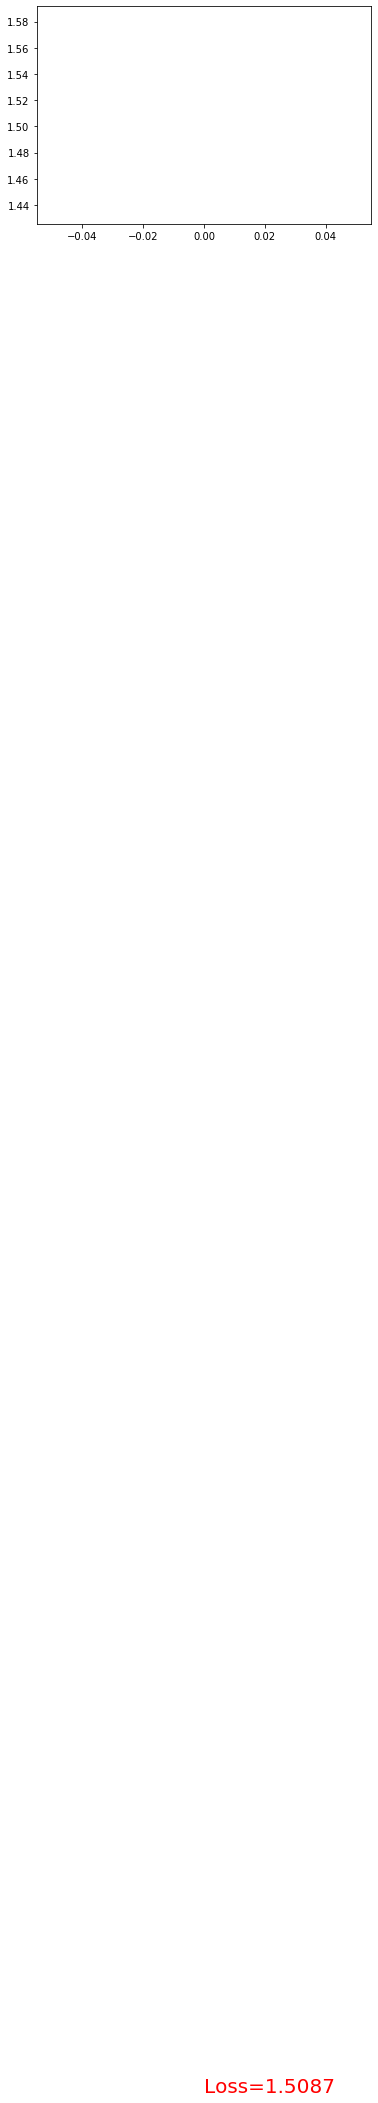

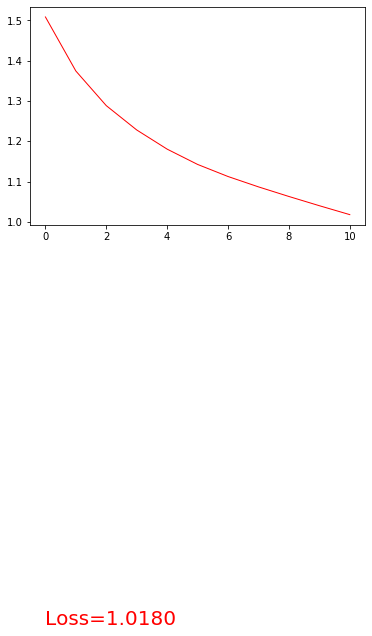

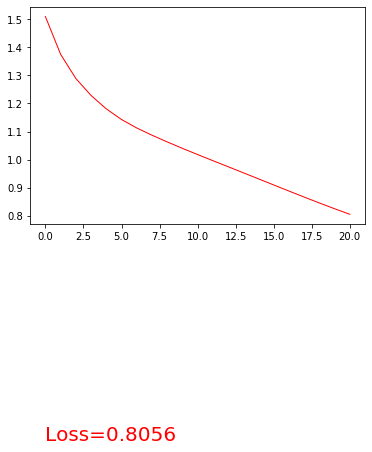

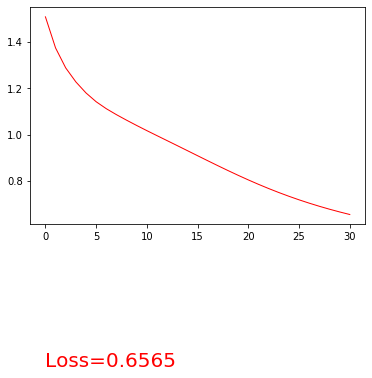

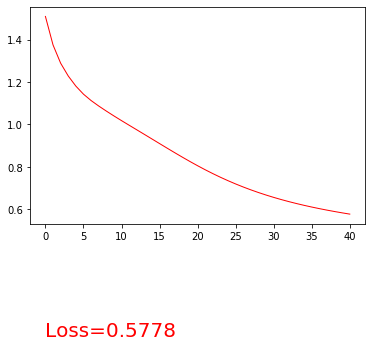

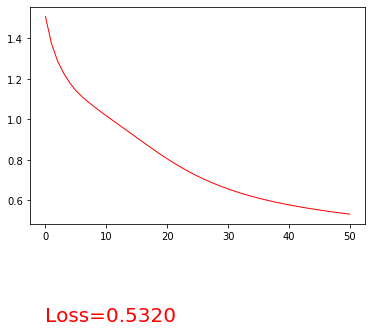

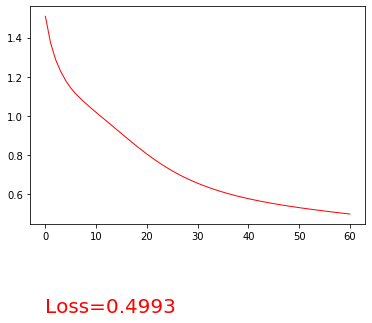

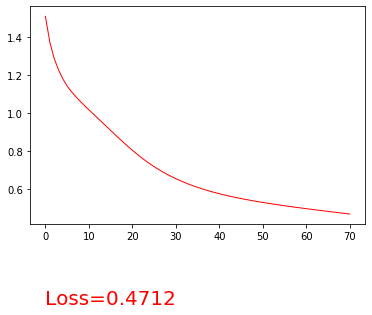

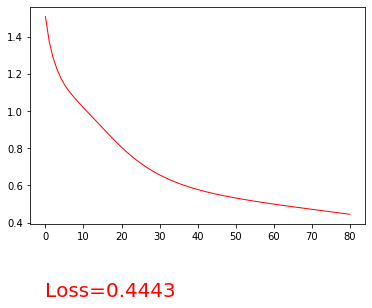

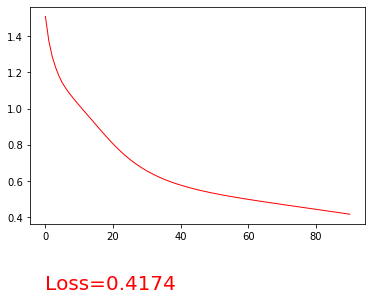

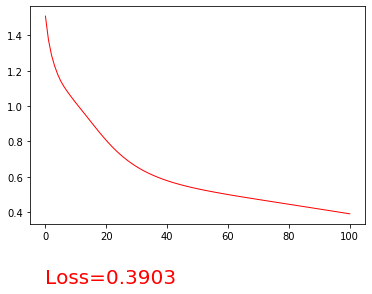

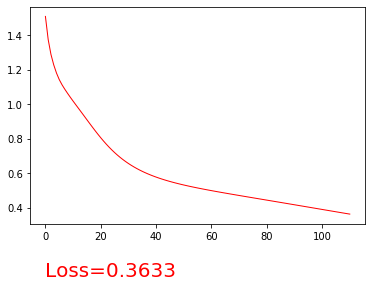

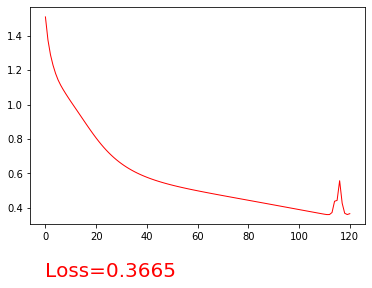

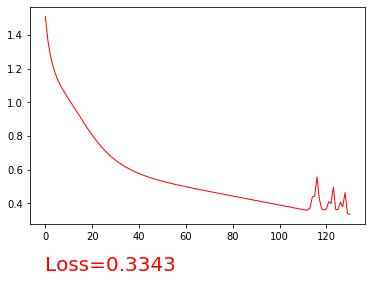

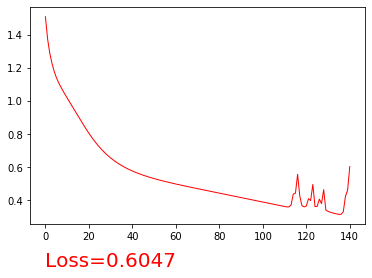

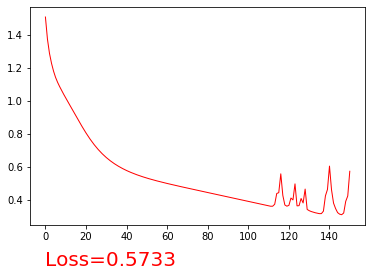

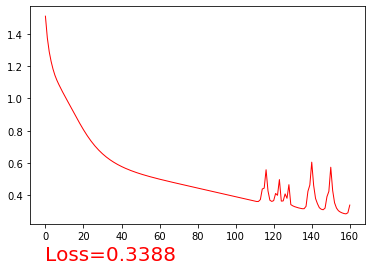

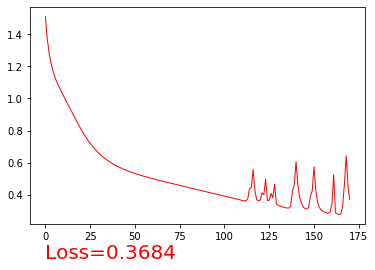

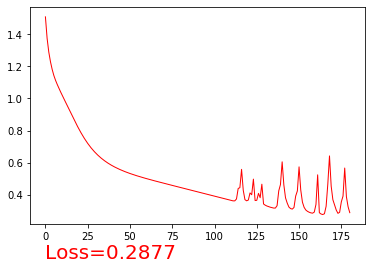

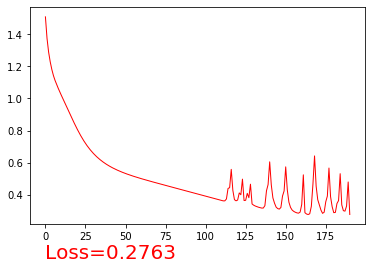

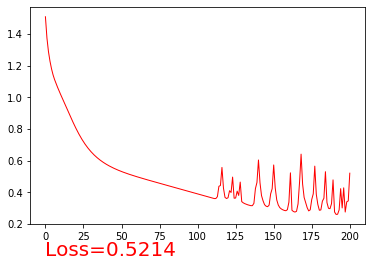

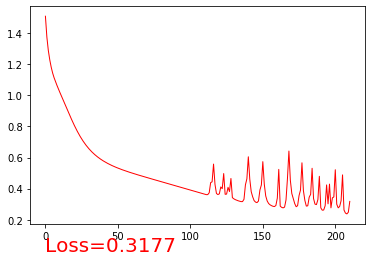

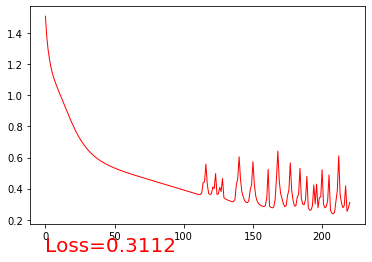

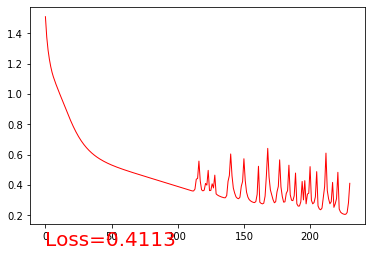

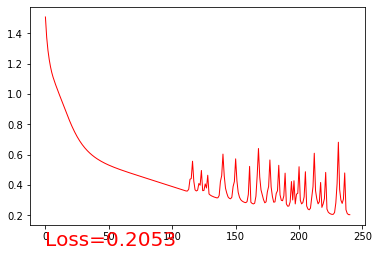

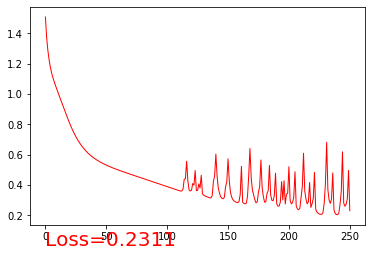

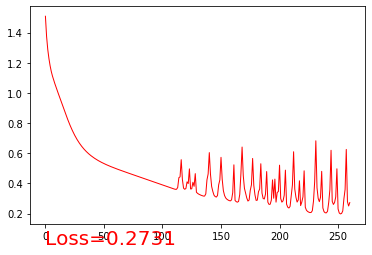

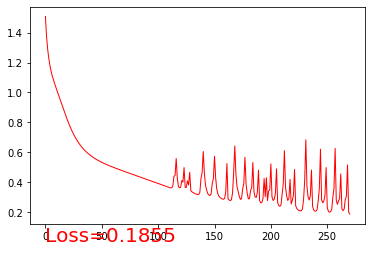

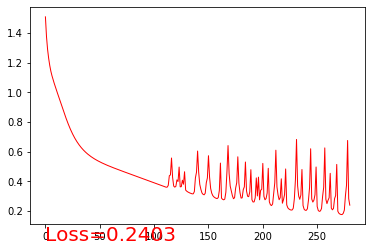

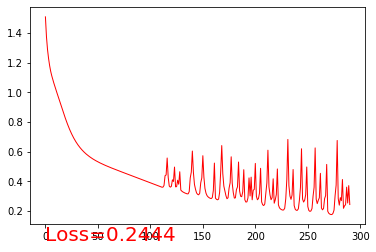

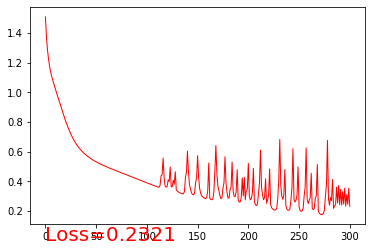

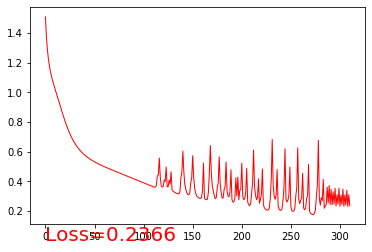

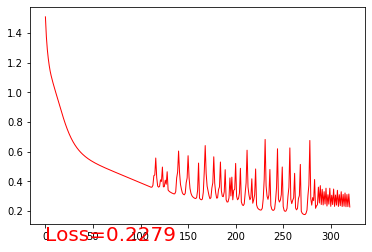

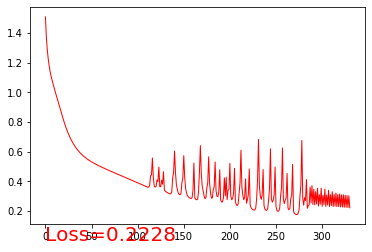

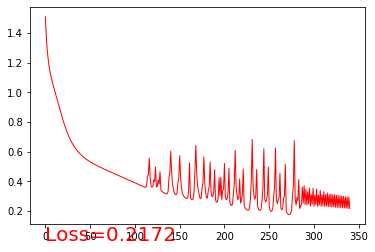

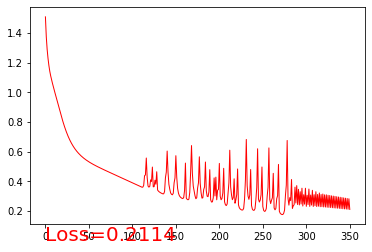

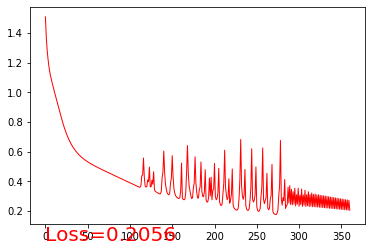

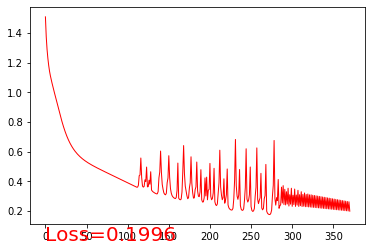

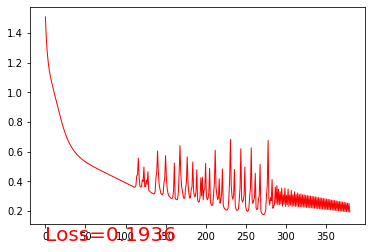

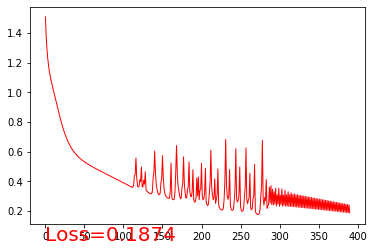

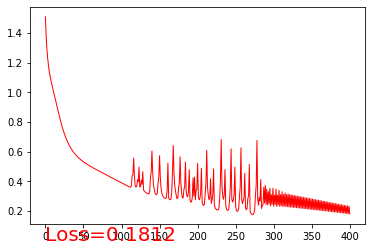

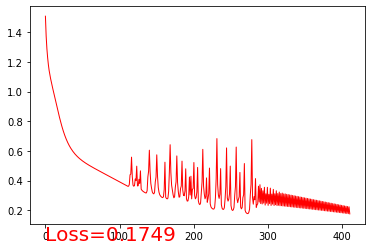

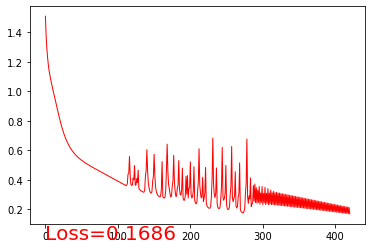

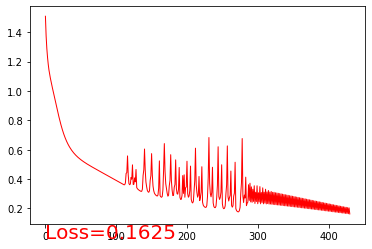

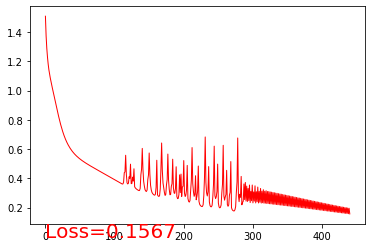

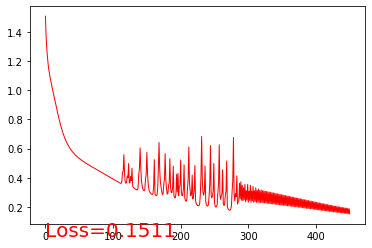

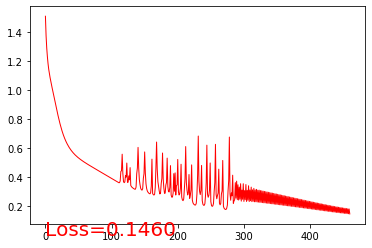

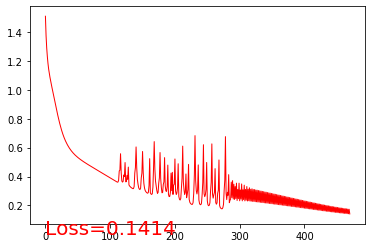

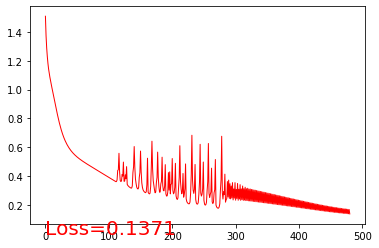

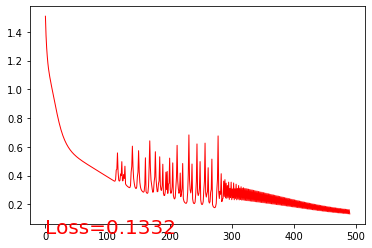

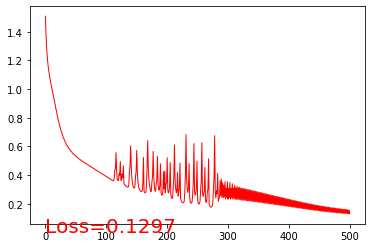

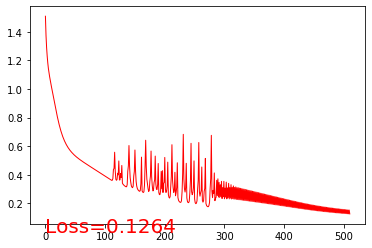

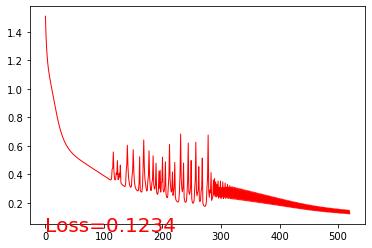

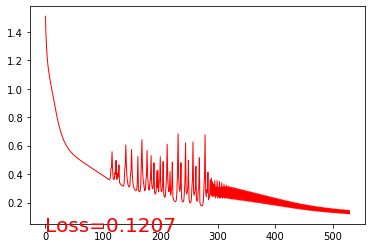

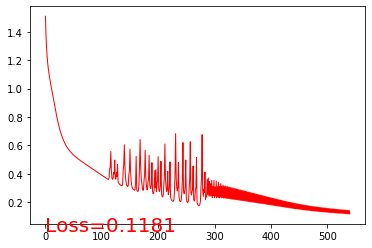

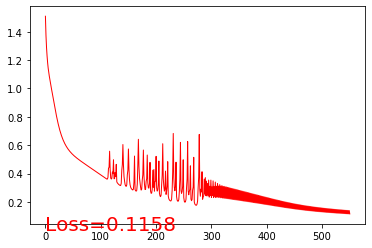

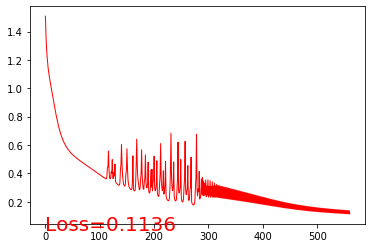

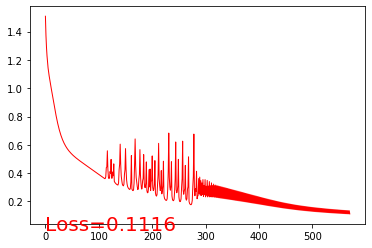

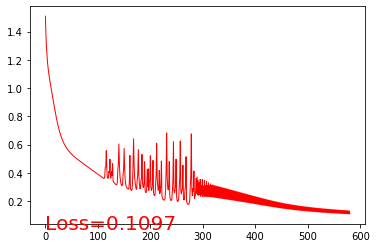

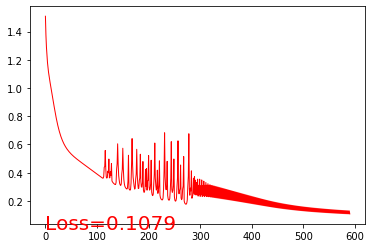

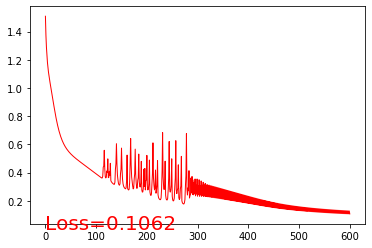

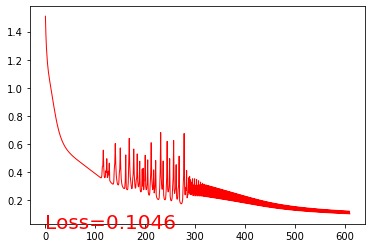

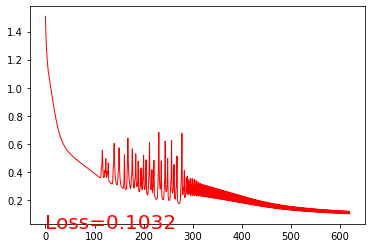

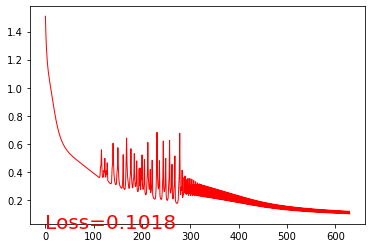

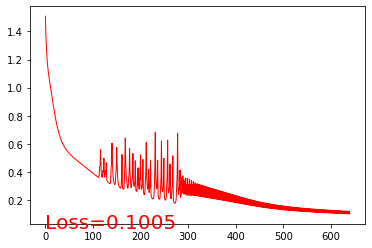

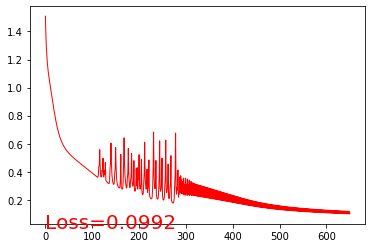

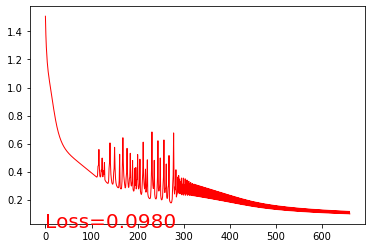

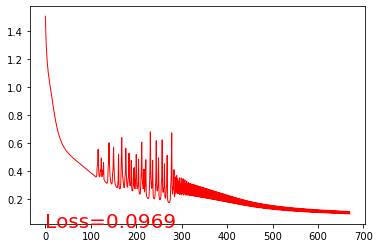

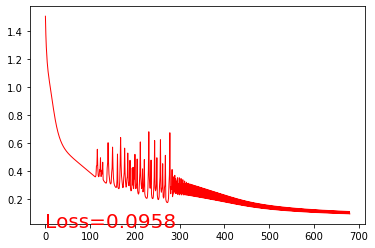

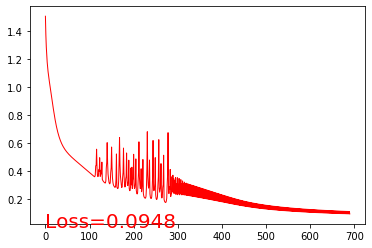

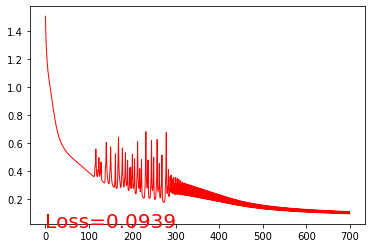

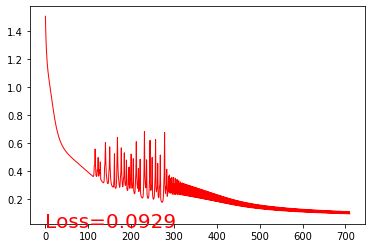

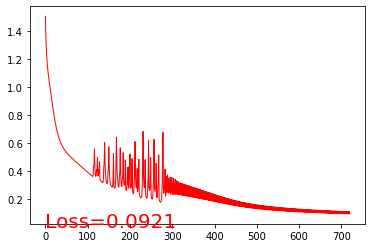

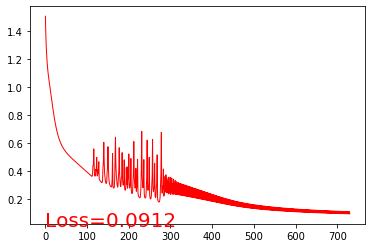

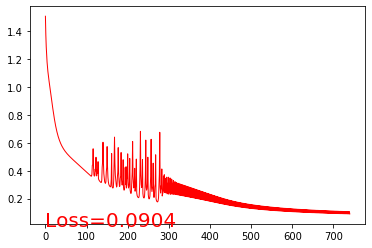

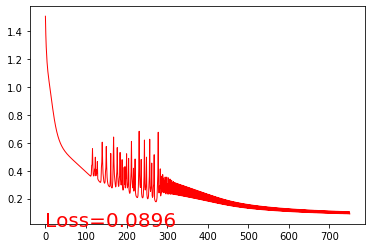

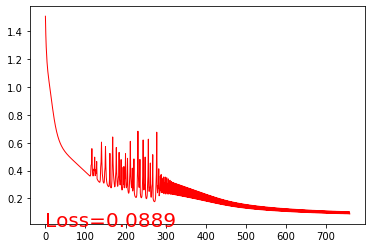

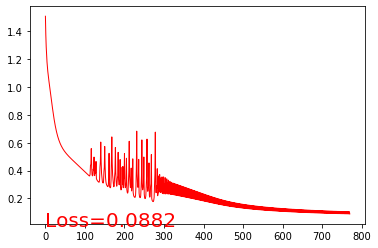

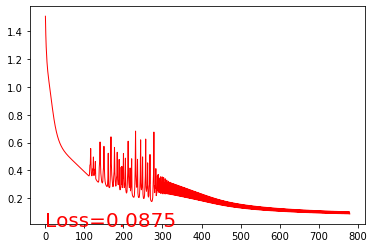

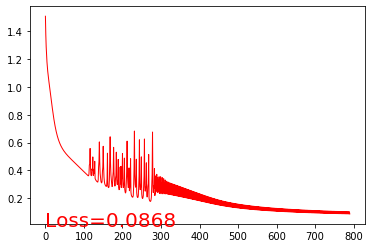

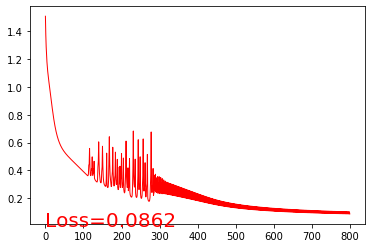

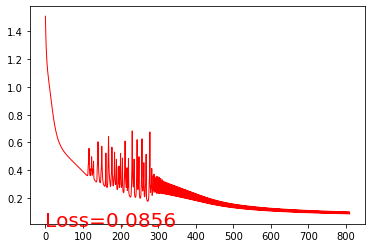

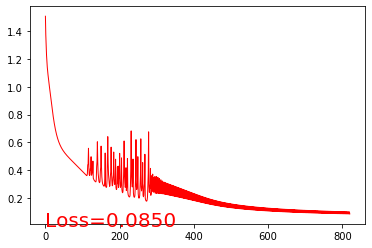

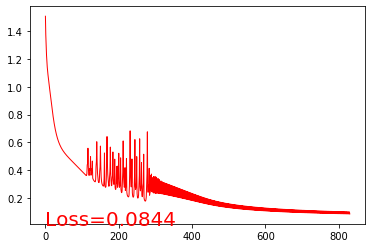

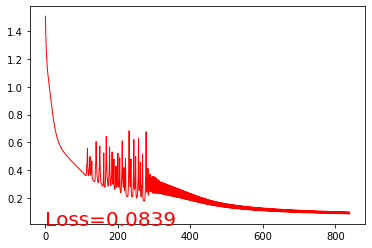

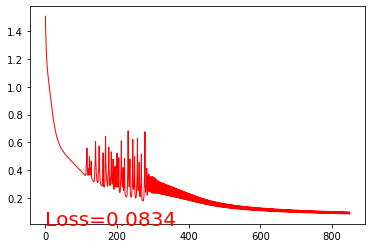

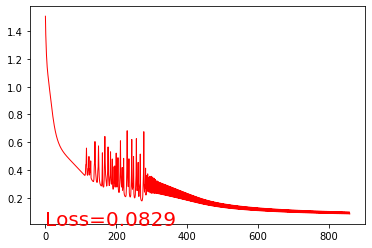

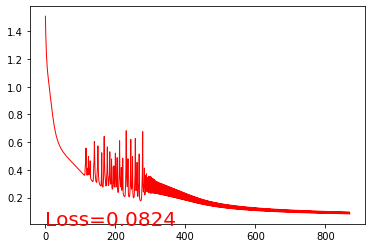

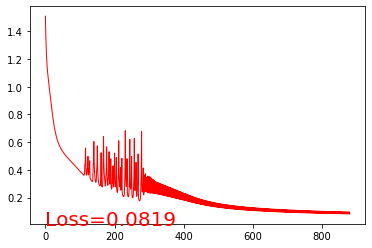

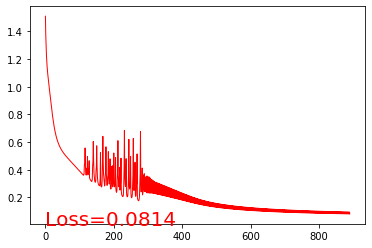

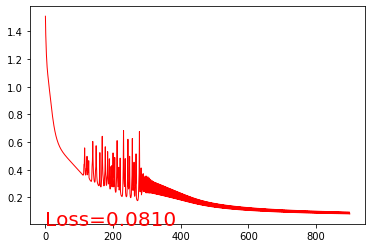

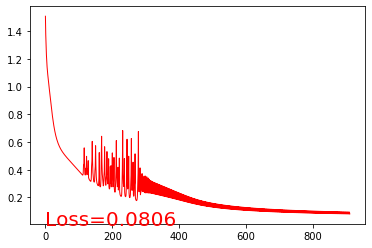

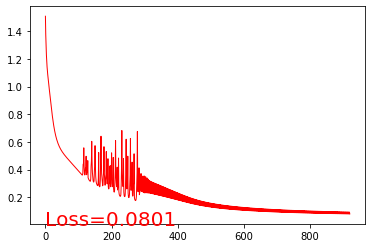

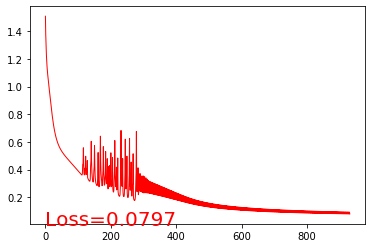

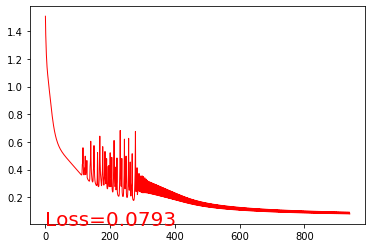

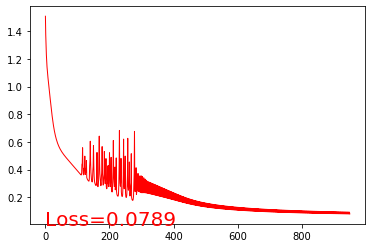

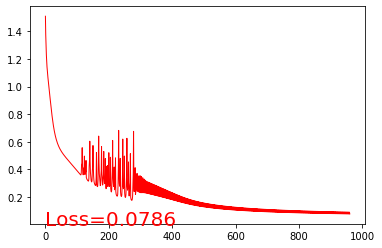

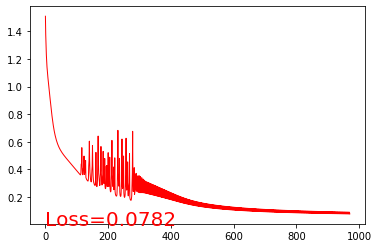

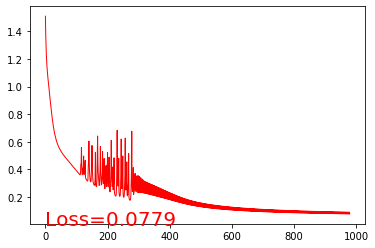

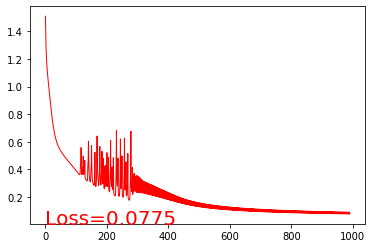

In [13]:
px,py=[],[]
for i in range(1000):
    prediction = net(x)
    loss= F.nll_loss(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print(i,'loss: ', loss.data[0])
    #print(i,'loss: ', loss.item())
    px.append(i)
    py.append(loss.item())
    if (i) % 10 == 0:
        plt.cla()
        plt.plot(px,py,'r-',lw=1)
        plt.text(0,0,'Loss=%.4f ' % loss.item(), fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        plt.show()